### Анализ данных
* *данную тетрадку лучше посмотреть локально или через google colab*
* *github немного некорректно рендерит ipynb (пропадают xml теги в выводе ячеек)*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/raw.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432158 entries, 0 to 432157
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   432158 non-null  object
 1   text    432158 non-null  object
 2   topic   432158 non-null  object
dtypes: object(3)
memory usage: 9.9+ MB


*3 текстовых столбца: title, text и topic; 432158 примеров*

In [4]:
def null_or_empty(series):
    return (series.isnull() | series == '').sum()

def type_value_counts(series):
    return series.apply(type).value_counts().to_dict()

In [5]:
type_value_counts(df['topic']), null_or_empty(df['topic'])

({str: 432158}, 0)

In [6]:
type_value_counts(df['title']), null_or_empty(df['title'])

({str: 432158}, 0)

In [7]:
type_value_counts(df['text']), null_or_empty(df['text'])

({str: 432158}, 0)

*title, text и topic: нет пропусков, нет пустых строк*

In [8]:
df['topic'].unique().tolist()

['Мир', 'Экономика', 'Интернет и СМИ', 'Спорт', 'Культура', 'Наука и техника']

In [9]:
df['topic'].value_counts(dropna=False).to_dict()

{'Мир': 136621,
 'Экономика': 79528,
 'Спорт': 64413,
 'Культура': 53797,
 'Наука и техника': 53136,
 'Интернет и СМИ': 44663}

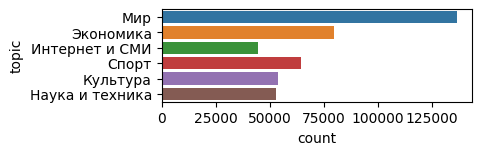

In [10]:
fig, ax = plt.subplots(figsize=(4,1.2))
sns.countplot(data=df, y='topic', orient='h', ax=ax);

* *topic: 6 классов, есть дисбаланс, но незначительный*
* *можно попробовать сделать downsampling для класса 'Мир'*

In [11]:
df['title_len'] = df['title'].str.len()

In [12]:
df.groupby('topic')['title_len'].apply('mean')

topic
Интернет и СМИ     56.651076
Культура           53.026730
Мир                56.127616
Наука и техника    51.479882
Спорт              55.283716
Экономика          55.038024
Name: title_len, dtype: float64

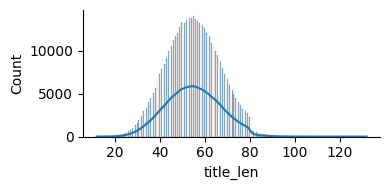

In [13]:
sns.displot(data=df, x='title_len', kde=True, height=2, aspect=2);

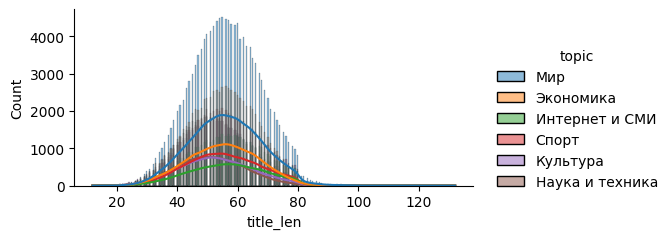

In [14]:
sns.displot(data=df, x='title_len', hue='topic', kde=True, height=2.5, aspect=2);

* *распределение длины title: близкое к нормальному*
* *распределение длины title по классам: нет значительных визуальных отличий*
* *в любом случае имеет смысл попробовать использовать title_len как дополнительный признак при обучении*

In [15]:
df.sort_values(by='title_len', ascending=True)[:2]

,title,text,topic,title_len
304155,Голубой краб,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Наука и техника,12
429540,Рубль поплыл,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Экономика,12


In [16]:
df.sort_values(by='title_len', ascending=False)[:2]

,title,text,topic,title_len
47910,Украинские болельщики пытались спровоцировать ...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Спорт,132
47100,"В последнем матче чемпионата ""Спартак"" проигра...","<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Спорт,121


* *минимальная длина заголовка: 12 символов*
* *максимальная длина заголовка: 132 символа*

In [17]:
df['text_len'] = df['text'].str.len()

In [18]:
df.groupby('topic')['text_len'].apply('mean')

topic
Интернет и СМИ     1457.984036
Культура           1309.878079
Мир                1379.935998
Наука и техника    1538.206320
Спорт              1192.956453
Экономика          1517.278556
Name: text_len, dtype: float64

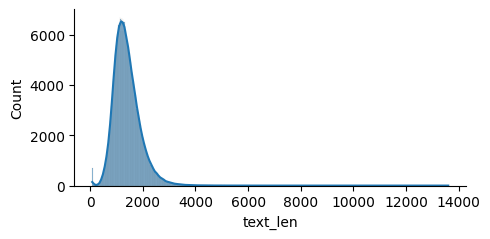

In [19]:
sns.displot(data=df, x='text_len', kde=True, height=2.5, aspect=2);

* *распределение длины text: визуально похоже на логнормальное*
* *достаточно тяжелый "хвост" справа: нужно посмотреть примеры текста (выбросы / "мусор?")*

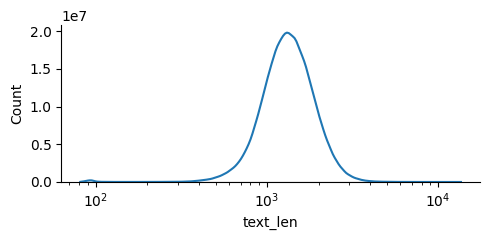

In [20]:
sns.displot(data=df, x='text_len', kde=True, log_scale=True, height=2.5, aspect=2);

* *логарифмирование text_len выравнивает распределние*
* *но результат не идеальный: теперь слева более тяжелый "хвост"*
* *можно попробовать сделать такое преобразование для text_len как признака*

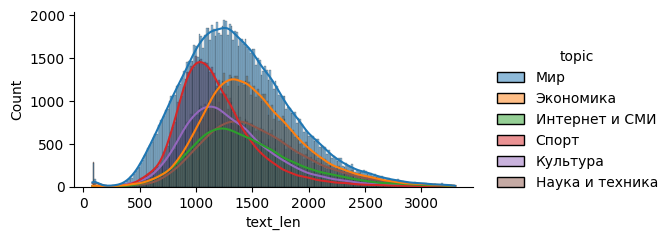

In [21]:
sns.displot(data=df[df['text_len'] < 3300], x='text_len', hue='topic', kde=True, height=2.5, aspect=2);

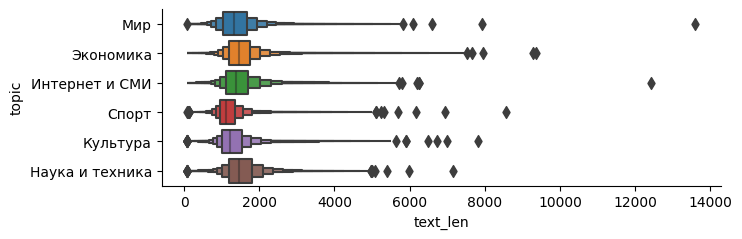

In [22]:
sns.catplot(data=df, x='text_len', y='topic', height=2.5, aspect=3, kind='boxen');

* *распределение длины text по классам: заметные отличия*
* *имеет смысл попробовать использовать text_len как дополнительный признак при обучении*

In [23]:
df.sort_values(by='text_len', ascending=True)[:3]

,title,text,topic,title_len,text_len
353942,Гребенщиков заработал 10 тысяч рублей в омском...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Культура,65,81
91190,В Стамбуле горит багажное отделение аэропорта ...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир,55,81
62644,Американцы задержали афганского сотрудника ООН,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир,46,84


In [24]:
df.loc[353942, 'text']

'<?xml version="1.0" encoding="utf-8"?>\n<conversion><person></person></conversion>'

In [25]:
df.loc[62644, 'text']

'<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>ООН</person></conversion>'

In [26]:
(df['text'].str.len() <= 81).sum()

2

* *минимальная длина текста: 81 символ*
* *81 символ: эквивалентно пустой строке (xml теги)*
* *всего 2а таких примера встретилось во всем датасете*

In [27]:
df.sort_values(by='text_len', ascending=False)[:2]

,title,text,topic,title_len,text_len
198061,Men's Health назвал 100 самых пьющих городов США,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир,48,13601
186634,"""Наши"" начали преследование автора статьи о ша...","<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Интернет и СМИ,53,12433


In [28]:
df.loc[198061, 'text'][:100]

'<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>Журналисты американской версии Men\'s Heal'

In [29]:
df.loc[198061, 'text'][100:200]

'th составили рейтинг ста самых пьющих городов США, пишет в четверг, 4 февраля, USA Today. Как стало '

In [30]:
df.loc[198061, 'text'][-100:]

" список с подробными комментариями появится в мартовском выпуске Men's Health.</person></conversion>"

* *максимальная длина текста: 13601 символ*

In [31]:
df['text'].str.contains('<\/?[A-Za-z]*>').sum() # xml / html

432158

In [32]:
df['text'].str.contains('\n').sum() # multiline

432158

In [33]:
df['text'].str.contains('[0-9]+[.,]?[0-9]*').sum() # numbers

432158

In [34]:
df['text'].str.contains('[a-zа-я][A-ZА-Я]').sum() # болееТысячи

54344

In [35]:
df.loc[0, 'text'][100:120] # вторуюгодовщину

' вторуюгодовщину со '

* *во всех 432158 примерах поле text содержит xml / html теги*
* *во всех 432158 примерах в поле text содержится символ переноса строки*
* *во всех 432158 примерах поле text содержит числа (в том числе с десятичной точкой или запятой)*
* *имеем 54344 случаев, когда сразу после буквы нижнего регистра идет буква верхнего (болееТысячи)*
* *кроме того, в тексте много кейсов, аналогичных предыдущему, но без разницы в регистре (вторуюгодовщину)*

In [36]:
df['title'].str.contains('\n').sum() # multiline

0

In [37]:
df['title'].str.contains('<\/?[A-Za-z]*>').sum() # xml / html

0

In [38]:
df['title'].str.contains('[0-9]+[.,]?[0-9]*').sum() # numbers

59457

* *в поле title нет xml / html тегов или символов переноса строки*
* *в 59457 примерах в поле title есть числа (в том числе с десятичной точкой или запятой)*

In [39]:
tqdm.pandas()

def cyrillic_letters_share(text):
    s = [c for c in text.lower() if c.isalpha()]
    c = sum(['а' <= c <= 'я' for c in s])
    return c / (len(text) + 1e-10)

df['text_cyr'] = df['text'].progress_apply(cyrillic_letters_share)
df['title_cyr'] = df['title'].progress_apply(cyrillic_letters_share)

  0%|          | 0/432158 [00:00<?, ?it/s]

  0%|          | 0/432158 [00:00<?, ?it/s]

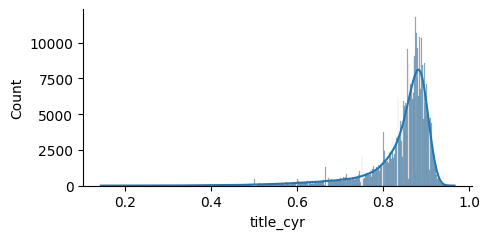

In [40]:
sns.displot(data=df, x='title_cyr', kde=True, height=2.5, aspect=2);

* *поле title преимущественно на русском языке*
* *так как в поле title нет xml тегов, важно посмотреть примеры из левого 'хвоста'*

In [41]:
df[df['title_cyr'] < 0.2].sort_values(by='title_cyr')['title'].to_list()[:5]

['Deutsche Boerse купит NYSE Euronext',
 'DaimlerChrysler купит Mitsubishi',
 'The Wall Street Journal "развела" Siemens и\xa0Fujitsu',
 "Baldur's Gate Enhanced Edition вышла на\xa0iPad",
 'Call of\xa0Duty: Black Ops Zombies вышел на\xa0iOS']

* *да, действительно, часто в заголовках много слов на английском языке (и других с латинским алфавитом)*

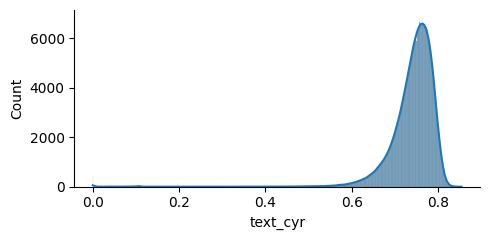

In [42]:
sns.displot(data=df, x='text_cyr', kde=True, height=2.5, aspect=2);

* *поле text преимущественно на русском языке*
* *тяжелый "хвост" слева частично может быть объяснен наличием xml тегов*

In [43]:
df[df['text_cyr'] < 0.2].sort_values(by='text_cyr')['text'].tolist()[:5]

['<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>CNN</person></conversion>',
 '<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>Accountability</person></conversion>',
 '<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>Business Week</person></conversion>',
 '<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>New York Times</person></conversion>',
 '<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>New York Times</person></conversion>']

* *xml теги + заголовок полностью на английском => нулевая доля символов кириллицы*

In [44]:
m = (df['text_cyr'] > 0.02) & (df['text_cyr'] < 0.5)
df[m].sort_values(by='text_cyr')['text'].tolist()[:5]

['<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>Бе-103</person></conversion>',
 '<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>ООН</person></conversion>',
 '<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>ЦРУ</person></conversion>',
 '<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>ЦРУ</person></conversion>',
 '<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>ООН</person></conversion>']

* *xml теги + короткий заголовок на русском => доля символов кириллицы менее 0.5*

#### **"< ?xml" и "< person >"**
* *можно удалить регулярками*

#### **"1,8 грамма" и "140 миллионов"**
* *извлечь полезный сигнал из такого текста будет сложно (особенно для простых моделей)*
* *сам факт наличия числа в том или ином месте текста может быть полезной информацией*
* *можно заменить на уникальную последовательность (например, "num")*

#### **"болееТысячи" и "14-летнийГарри"**
* *54344 примеров, можно исправить регулярками*

#### **"Средичленов" и "вторуюгодовщину"**
* *исходя из визуальной оценки, таких примеров достаточно много*
* *чтобы исправить это, нужна языковая модель (частотная или нейросетевая)*
* *но эта языковая модель должна быть легкой и быстрой (на этапе инференса она также будет нужна)*

#### **"aerospace" и "bang"**
* *в тексте много слов на английском языке*
* *можно попробовать перевести их, используя внешние сервисы или языковые модели*
* *однако, новые данные нужно будет прогонять через те же инструменты на этапе инференса*
* *можно попробовать реализовать локальный простой переводчик (по сути справочник - dict)*

#### **"кто-то" и "фотографам-папарацци"**
* *хотелось бы сохранить "кто-то" как отдельный токен
* *вероятно, для "фотографам-папарацци" это также подойдет*
* *можно решить регулярками*